## 第四节

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('result.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


最基本的可视化图案有：折线图，柱状图，饼图，频率直方图等。

折线图可以表示某个属性的变化趋势。

柱状图可以表示数据之间的差异。

饼图可以有效观察属性的占比。

频率直方图可以观察数据的分布特征。

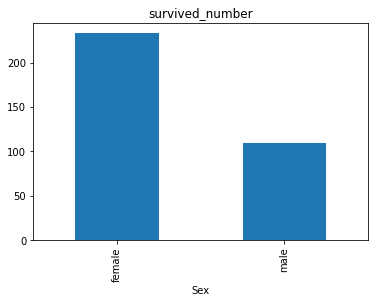

In [31]:
#可视化展示泰坦尼克号数据集中男女生存人数分布情况。
survived_sex = df.groupby('Sex')['Survived'].sum()
survived_sex.plot.bar()
plt.title('survived_number')
plt.show()

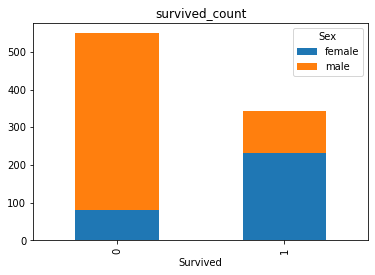

In [42]:
#可视化展示泰坦尼克号数据集中男女生存人数与死亡人数的比例图
df.groupby(['Survived', 'Sex'])['Sex'].count().unstack().plot(kind='bar',stacked=True)
plt.title('survived_count')''
plt.show()

<AxesSubplot:xlabel='Survived'>

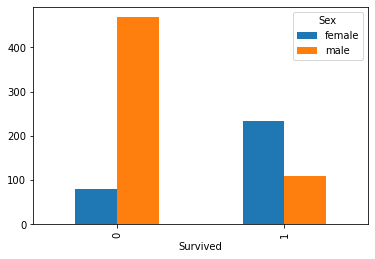

In [43]:
df.groupby(['Survived', 'Sex'])['Sex'].count().unstack().plot(kind='bar')

DataFrame.plot(*args, **kwargs)

data: Series or DataFrame

kind: 可视化图案选择。

stacked(bool): default False in line and bar plots, and True in area plot.
为真就将两个叠在一起。

In [51]:
# 可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数的分布情况（折线图）
fare_sur = df.groupby('Fare')['Survived'].value_counts().sort_values(ascending=False)
fare_sur

Fare     Survived
8.0500   0           38
7.8958   0           37
13.0000  0           26
7.7500   0           22
13.0000  1           16
                     ..
7.7417   0            1
26.2833  1            1
7.7375   1            1
26.3875  1            1
22.5250  0            1
Name: Survived, Length: 330, dtype: int64

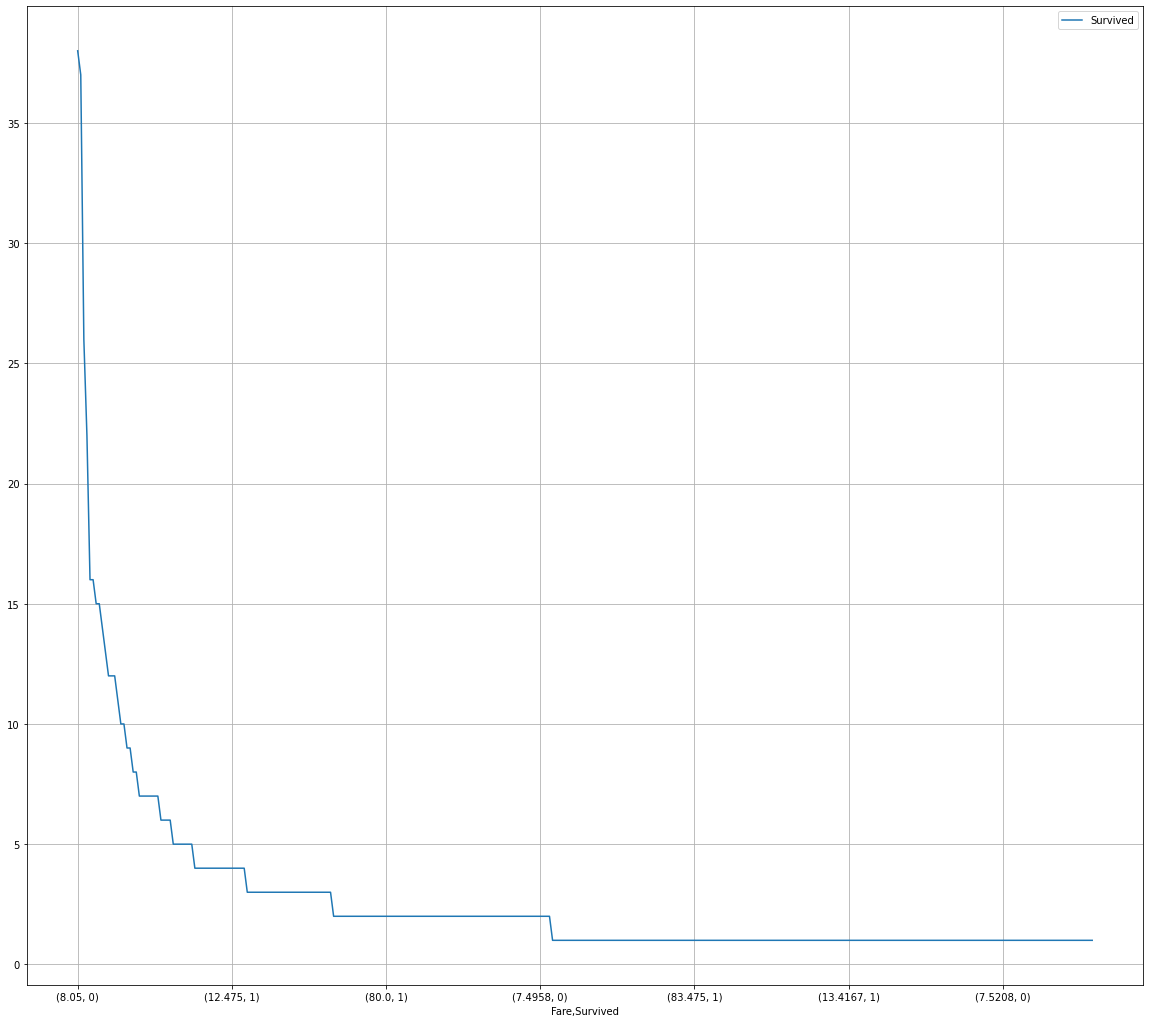

In [52]:
#排序后的折线图
fig = plt.figure(figsize=(20, 18))
fare_sur.plot(grid=True)
plt.legend()
plt.show()

In [53]:
pclass_sur = df.groupby('Pclass')['Survived'].value_counts()
pclass_sur

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

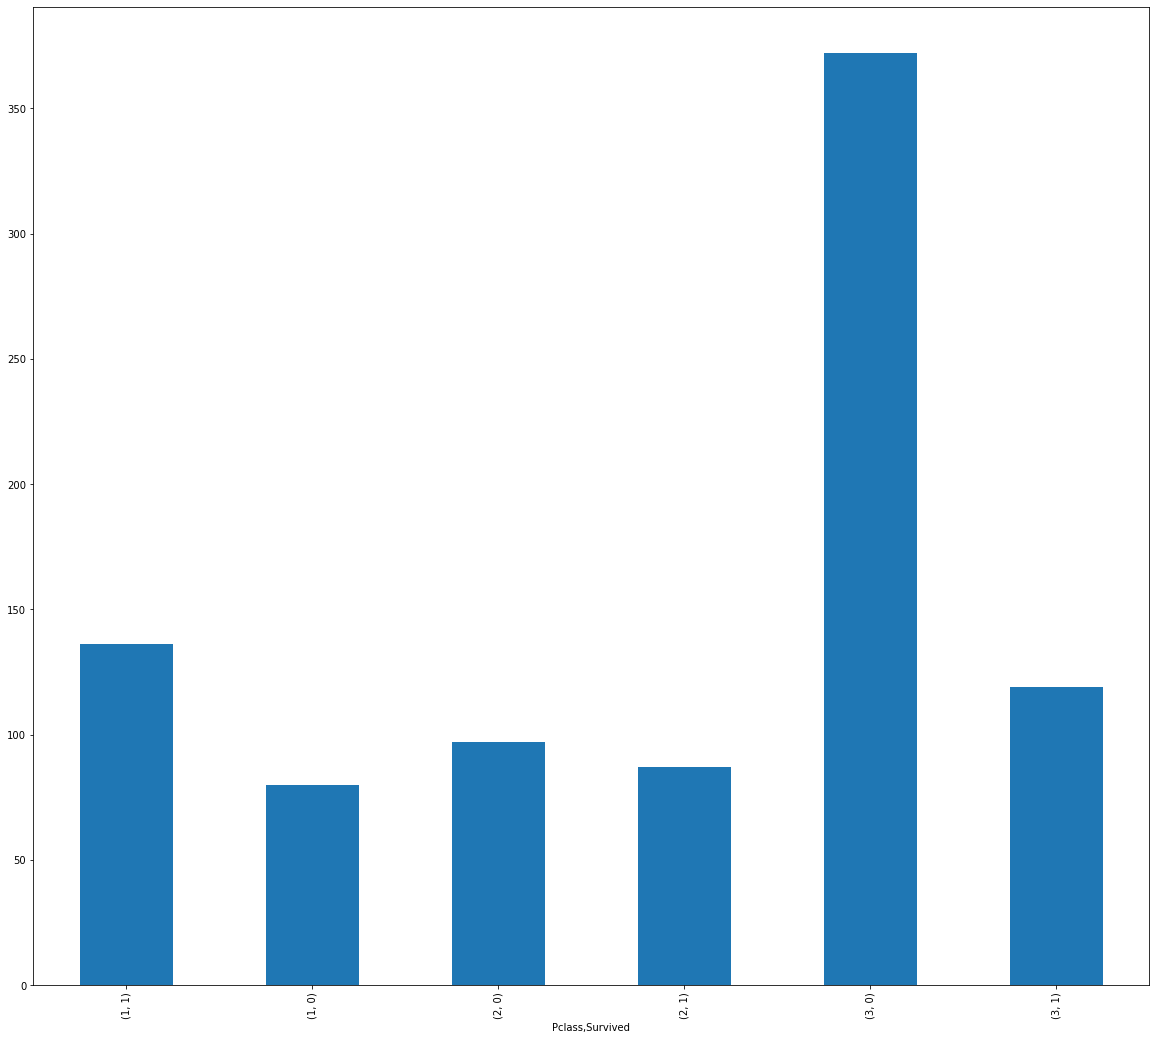

In [55]:
fig = plt.figure(figsize=(20,18))
pclass_sur.plot.bar()
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

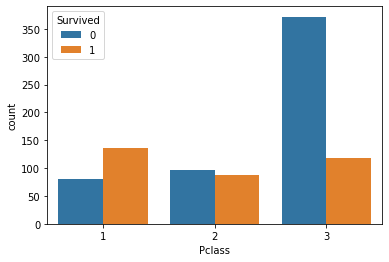

In [61]:
import seaborn as sns
sns.countplot(x="Pclass", hue="Survived", data=df)

感受和总结：
折线图可以很明显的看到趋势的变化，柱状图便于比较，但有时不表现出数据的特征。例如计算票价的生存人数时，虽然票价低的人数存活更多，但不能得出票价低存活率高这个结论，还需和总人数进行比较，需要画出比例图。

In [56]:
#可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。
age_sur = df.groupby('Age')['Survived'].value_counts()
age_sur

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 142, dtype: int64

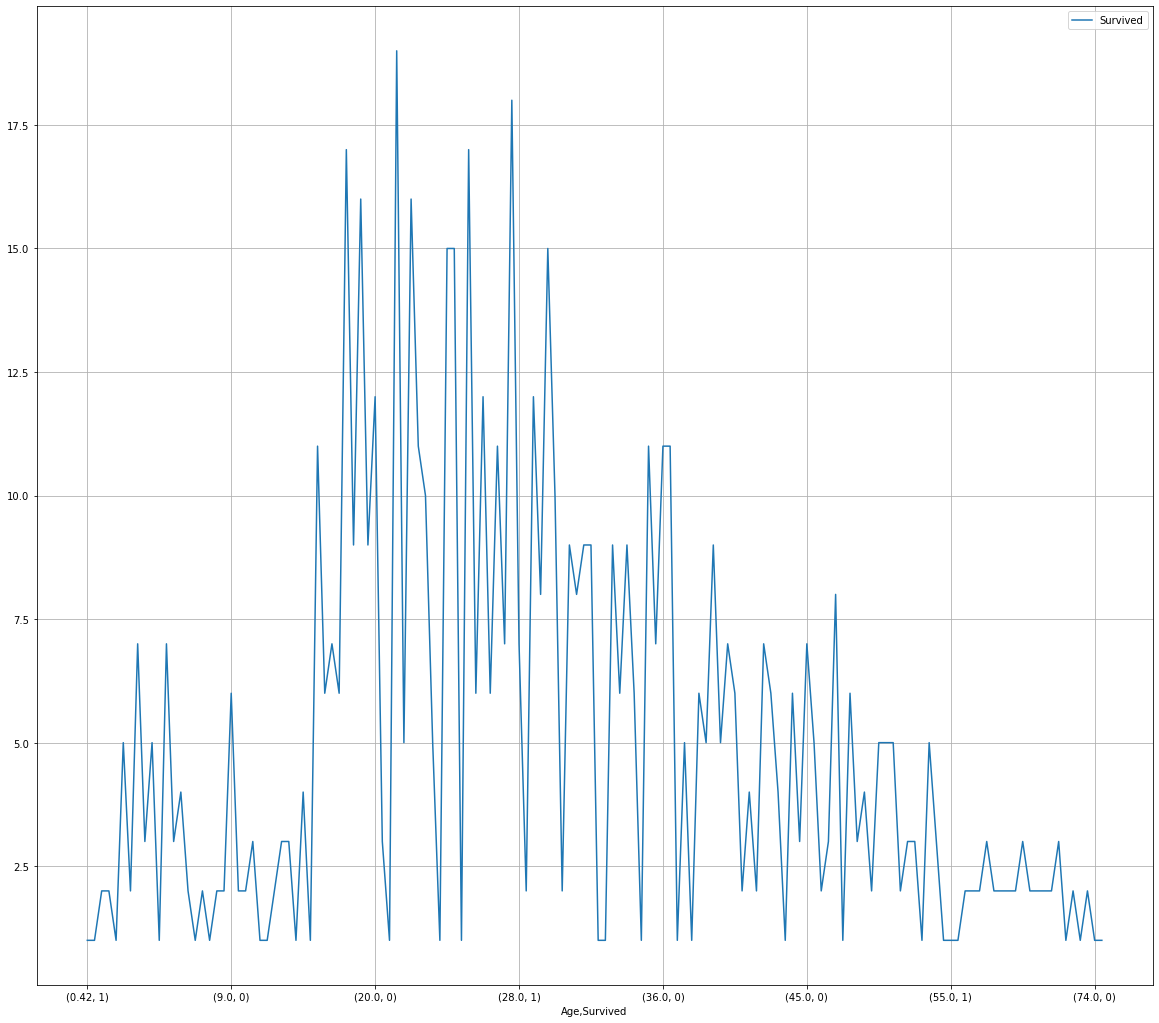

In [70]:
fig = plt.figure(figsize=(20,18))
age_sur.plot(grid=True)
plt.legend()
plt.show()

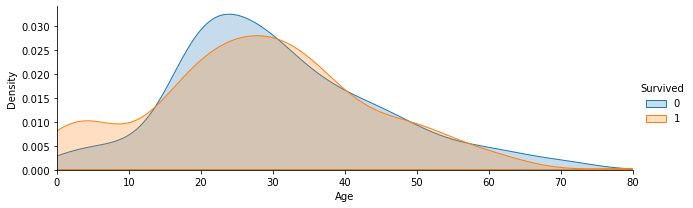

In [64]:
facet = sns.FacetGrid(df, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

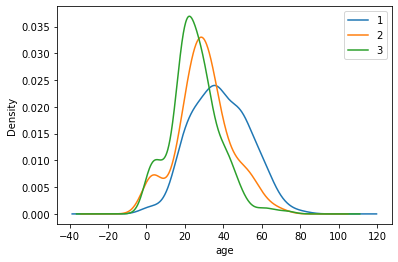

In [66]:
df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")